# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *

 99%|███████████████████████████████████▍| 273880/277963 [51:23<00:54, 74.33it/s]

pls    0.0043
dtype: float64
--------------------------------------
                 date   close_type     pls
0 2021-03-01 15:59:17   sema_close -0.0012
1 2021-03-01 17:59:06   sema_close -0.0011
2 2021-03-02 10:26:34   sema_close  0.0019
3 2021-03-03 08:06:16  angle_close  0.0062
4 2021-03-03 09:34:59   sema_close -0.0021
5 2021-03-03 10:43:00   sema_close -0.0013
6 2021-03-03 15:54:29   sema_close  0.0021
7 2021-03-03 21:00:08   sema_close -0.0002


100%|████████████████████████████████████| 277963/277963 [52:15<00:00, 88.66it/s]


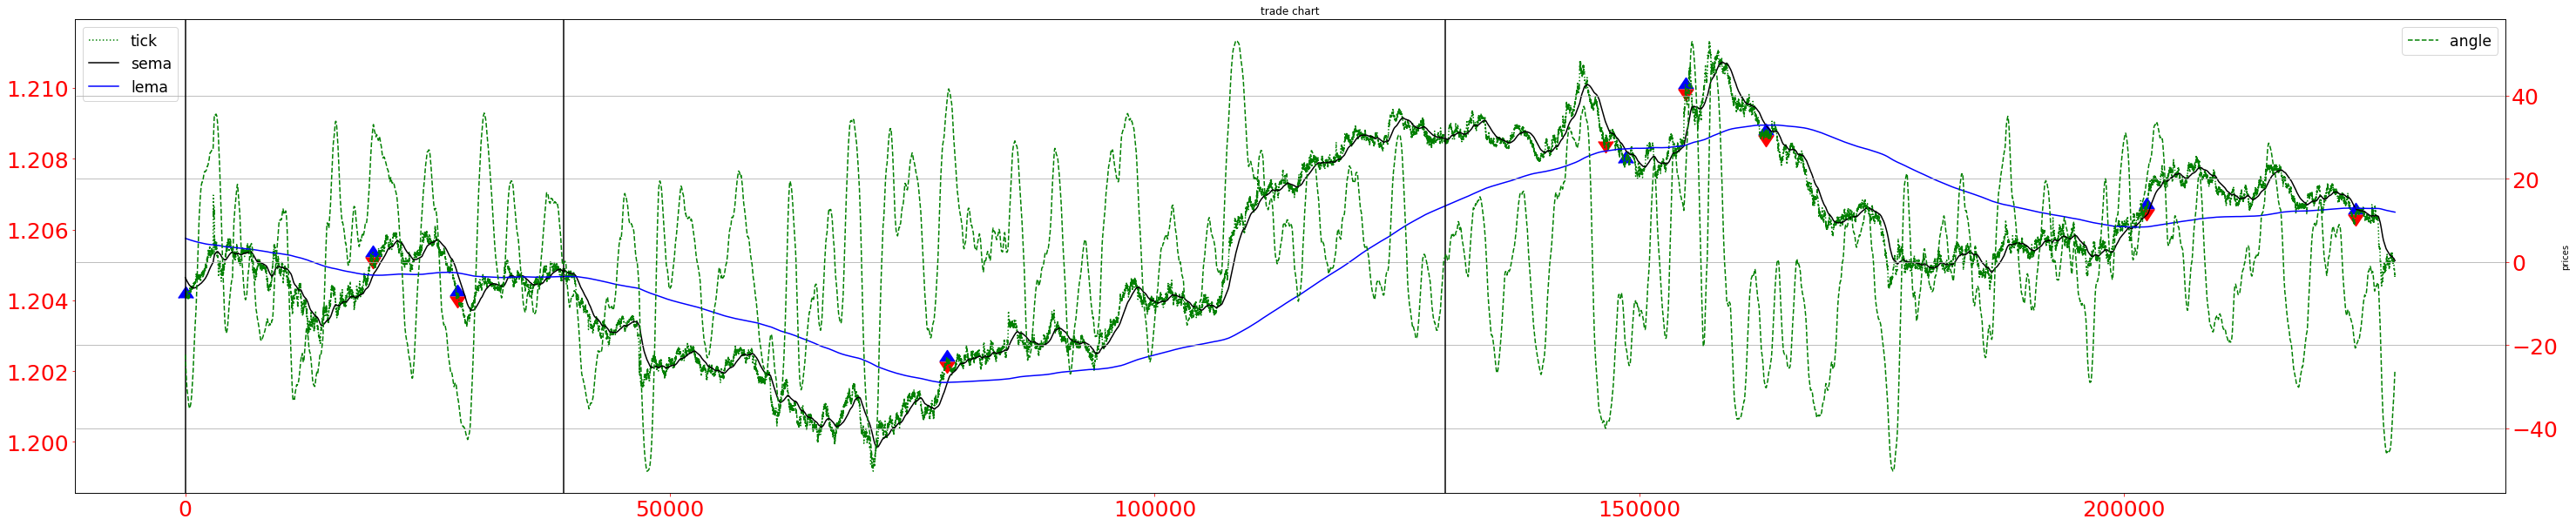

-----------------------------------------------------
date_val          : ['20210301', '20210302', '20210303']
Total PL : 0.0043
-------------
net_pl            : 0.0043/0.0161
-------------
+ve               : num= 3    sum= +0.0102    avg= +0.0034
-ve               : num= 5    sum= -0.0059    avg= -0.00118
-----------------------------------------------------
date_val
1   -0.0023
2    0.0019
3    0.0047
Name: pls, dtype: float64
-----------------------------------------------------
-0.0002    1
-0.0013    1
-0.0021    1
 0.0062    1
-0.0012    1
 0.0019    1
 0.0021    1
-0.0011    1
Name: pls, dtype: int64
-----------------------------------------------------


,date,year_val,month_val,date_val,hour_val,minute_val,close_type,pls
0,2021-03-01 15:59:17,2021,3,1,15,59,sema_close,-0.0012
1,2021-03-01 17:59:06,2021,3,1,17,59,sema_close,-0.0011
2,2021-03-02 10:26:34,2021,3,2,10,26,sema_close,0.0019
3,2021-03-03 08:06:16,2021,3,3,8,6,angle_close,0.0062
4,2021-03-03 09:34:59,2021,3,3,9,34,sema_close,-0.0021
5,2021-03-03 10:43:00,2021,3,3,10,43,sema_close,-0.0013
6,2021-03-03 15:54:29,2021,3,3,15,54,sema_close,0.0021
7,2021-03-03 21:00:08,2021,3,3,21,0,sema_close,-0.0002


In [2]:
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

if data["plot"]:
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

In [3]:
for k in data.keys():
    if 'order' in k:
        print(k, data[k])

open_order True
open_order_type short
sema_make_order_angle 20
sema_close_order_angle 20
tick_order_angle 30
order_bid_price 1.20642
order_ask_price 1.2065700000000001
